In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from itertools import cycle

In [50]:
def transform_data(data: pd.DataFrame) -> pd.DataFrame:
    data.drop(columns=['Index', 'SMU-1 Time (s)', 'Resistance (Ohm)'], inplace=True)
    data.rename(columns={'SMU-1 Voltage (V)':'Voltage', 'SMU-1 Current (A)':'Current'}, inplace=True)
    data.Current = data.Current * 10**6
    
    return data

In [51]:
main_path = '/kaggle/input/nacl-fwd-rev-2023'

In [52]:
dfs_002 = []
dfs_01 = []
dfs_05 = []
dfs_1 = []
dfs_5 = []


for file_path in glob.iglob(main_path + '/002/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_002.append(data)
    
for file_path in glob.iglob(main_path + '/01/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_01.append(data)
    
for file_path in glob.iglob(main_path + '/05/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_05.append(data)
    
for file_path in glob.iglob(main_path + '/1/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_1.append(data)
    
for file_path in glob.iglob(main_path + '/5/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_5.append(data)

In [53]:
colors = ['r', 'b', 'g', 'c', 'm', 'k']
linestyles = ['-', '--', '-.', ':']

color_cycle = cycle(colors)
linestyle_cycle = cycle(linestyles)

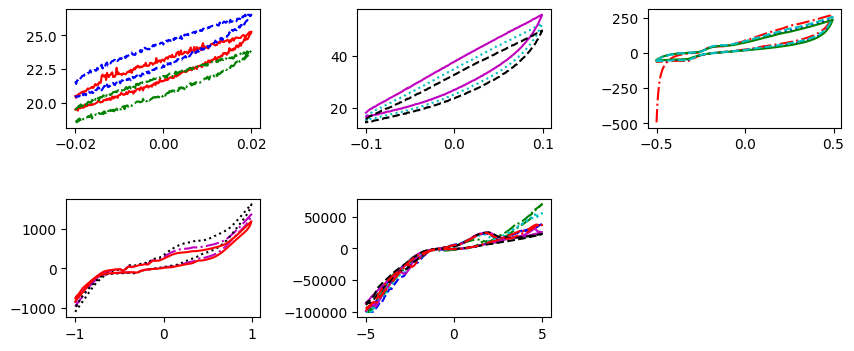

In [54]:
figure, axis = plt.subplots(2, 3, figsize=(10, 4))
axis[1][2].set_visible(False)
axis[1][0].set_position([0.24,0.125,0.228,0.343])
axis[1][1].set_position([0.55,0.125,0.228,0.343])




for i in range(len(dfs_002)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[0, 0].plot(dfs_002[i].Voltage, dfs_002[i].Current, linestyle=linestyle, color=color)
    
for i in range(len(dfs_01)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[0, 1].plot(dfs_01[i].Voltage, dfs_01[i].Current, linestyle=linestyle, color=color)
    
for i in range(len(dfs_05)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[0, 2].plot(dfs_05[i].Voltage, dfs_05[i].Current, linestyle=linestyle, color=color)
    
for i in range(len(dfs_1)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[1, 0].plot(dfs_1[i].Voltage, dfs_1[i].Current, linestyle=linestyle, color=color)
    
for i in range(len(dfs_5)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[1, 1].plot(dfs_5[i].Voltage, dfs_5[i].Current, linestyle=linestyle, color=color)
    

figure.subplots_adjust(left=None, bottom=None, right=0.9, top=None, wspace=0.5, hspace=0.6)
plt.show()